In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
                                             1.7/266.3 MB 26.1 kB/s eta 2:49:12


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
soc

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math
import plotly.express as px
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Bidirectional, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed, RepeatVector
from keras.optimizers import Adam , SGD , RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def calculate_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)



In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.subplots(figsize=(5, 12))
    plt.barh(width, scores,height=0.5, align='edge')
    plt.yticks(width, ticks, fontsize=9)
    plt.title('Mutual Information Scores')




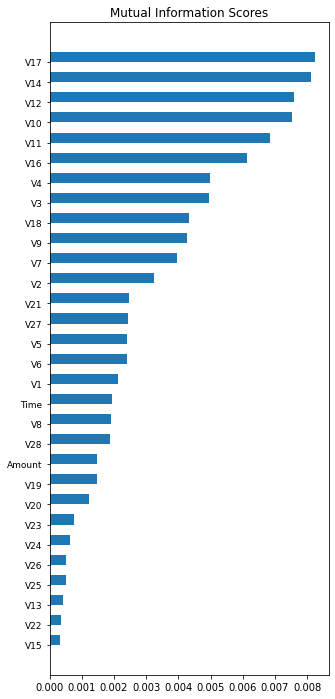

In [ ]:
# Define X and y
X = df.copy()
y = X.pop('Class')


mi_scores = calculate_mi_scores(X, y)
#display(mi_scores)
plot_mi_scores(mi_scores)

**SMOTE Class Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

sm =  SMOTE(random_state=12, sampling_strategy=0.7)

X_sm, y_sm =  sm.fit_resample(X,y)

X_sm.shape, y_sm.shape


print('Original copy dataset shape {}'.format(Counter(y)))
print('Resampled copy dataset shape {}'.format(Counter(y_sm)))

Original copy dataset shape Counter({0: 284315, 1: 492})
Resampled copy dataset shape Counter({0: 284315, 1: 199020})


In [ ]:
y_sm.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X_sm, y_sm, train_size=0.70, random_state=42)

# To standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [ ]:
X_train.shape

(338334, 30)

In [ ]:
y_valid.shape

(145001,)

**Simple Neural Network**

In [ ]:
simple_nn = Sequential()
simple_nn.add(Dense(64, input_dim=30, activation='relu')) 
simple_nn.add(Dense(32, activation='relu'))
simple_nn.add(Dense(16, activation='relu'))
simple_nn.add(Dense(8, activation='relu'))
simple_nn.add(Dense(1, activation='sigmoid'))
simple_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                1984      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = simple_nn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
10573/10573 [==============================] - 48s 4ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0103 - val_accuracy: 0.9971
Epoch 2/5
10573/10573 [==============================] - 40s 4ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0086 - val_accuracy: 0.9980
Epoch 3/5
10573/10573 [==============================] - 37s 3ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/5
10573/10573 [==============================] - 43s 4ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0058 - val_accuracy: 0.9983
Epoch 5/5
10573/10573 [==============================] - 38s 4ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9983


In [ ]:
loss, acc_train = simple_nn.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = simple_nn.evaluate(X_valid ,y_valid,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.9987586140632629
Accuracy on Test Set:  0.9983241558074951


**Data preprocessing for CNN**

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_val_cnn = X_valid.reshape(X_valid.shape[0],X_valid.shape[1],1)

In [ ]:
X_train_cnn.shape
#X_val_cnn.shape

(338334, 30, 1)

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(filters=16, kernel_size=3, input_shape=(np.shape(X_train_cnn)[1],1)))
cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64))
cnn.add(Dense(1))
cnn.compile(loss='mse', optimizer='adam',metrics = ['accuracy'])
cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 16)            64        
                                                                 
 flatten_2 (Flatten)         (None, 448)               0         
                                                                 
 dropout_2 (Dropout)         (None, 448)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                28736     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 28,865
Trainable params: 28,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
10573/10573 [==============================] - 45s 4ms/step - loss: 0.0792 - accuracy: 0.9262 - val_loss: 0.0709 - val_accuracy: 0.9374
Epoch 2/5
10573/10573 [==============================] - 45s 4ms/step - loss: 0.0735 - accuracy: 0.9304 - val_loss: 0.0706 - val_accuracy: 0.9277
Epoch 3/5
10573/10573 [==============================] - 43s 4ms/step - loss: 0.0732 - accuracy: 0.9303 - val_loss: 0.0698 - val_accuracy: 0.9331
Epoch 4/5
10573/10573 [==============================] - 49s 5ms/step - loss: 0.0730 - accuracy: 0.9307 - val_loss: 0.0695 - val_accuracy: 0.9324
Epoch 5/5
10573/10573 [==============================] - 45s 4ms/step - loss: 0.0729 - accuracy: 0.9310 - val_loss: 0.0697 - val_accuracy: 0.9320


In [ ]:
loss, acc_train = cnn.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = cnn.evaluate(X_valid ,y_valid,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.932235598564148
Accuracy on Test Set:  0.931979775428772
